In [1]:
#importing required libraries as below 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#now using pandas we can read the file below 

flight_df = pd.read_csv("flight_data.csv")

In [3]:
flight_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
#checkint the info for the dataset

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#shape of datasets 

flight_df.shape

(10683, 11)

In [6]:
#now here imma need to check for some missing valuees 

flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#from above missing values is known, since i see only two missing values 
#i can come to decision that i can drop those two rows ,which not gonna make much difference to build model in future....

In [8]:
#lets now drop the missing values rows 

flight_df.dropna(inplace=True)

In [9]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
#as from above resulti can see the missing vaues rows are now completely dropped 


In [11]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [12]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
flight_df['Journey_Day']= pd.to_datetime(flight_df.Date_of_Journey,format ='%d/%m/%Y').dt.day

flight_df['Journey_Month']= pd.to_datetime(flight_df.Date_of_Journey,format ='%d/%m/%Y').dt.month

flight_df['Journey_Year']= pd.to_datetime(flight_df.Date_of_Journey,format ='%d/%m/%Y').dt.year

flight_df




,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [14]:
flight_df['Dep_hour']= pd.to_datetime(flight_df.Dep_Time).dt.hour

flight_df['Dep_min']= pd.to_datetime(flight_df.Dep_Time).dt.minute


In [15]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [16]:
#above here i created some new columns for the journey date and time and departure time

In [17]:
#from above i see one column called additional info,where i see most o the rows is said as no info so 
#so i will check now here for some unique values ,

In [18]:
flight_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
#from above i see some of different info in column additinal info

In [20]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_Day      10682 non-null  int64 
 12  Journey_Month    10682 non-null  int64 
 13  Journey_Year     10682 non-null  int64 
 14  Dep_hour         10682 non-null  int64 
 15  Dep_min          10682 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [21]:
#i can now drop the columns date of journey and dep time since its in object data type

In [22]:

flight_df.drop(columns=['Dep_Time'],inplace=True)


In [23]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [24]:
#time duration to list fom 

Time_duration =list(flight_df.Duration)

In [25]:
flight_df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [26]:
#here i wanna use for loop for time duration as i see hours and min ar not in all same formate,
#so im striping and adding 0h and 0m if it has missing that valuee

for i in range(len(Time_duration)):
    if len(Time_duration[i].split()) !=2:
        if 'h' in Time_duration[i]:
            Time_duration[i]= Time_duration[i].strip() + " 0m "
        elif 'm' in Time_duration[i]:
            Time_duration[i] = "0h {}".format(Time_duration[i].strip())
            


In [27]:
#after for loop now putting the same values in diff columns by using append

Time_duration_hours = []
Time_duration_mins =[]

for i in range(len(Time_duration)):
    Time_duration_hours.append(int(Time_duration[i].split()[0][:-1]))
    Time_duration_mins.append(int(Time_duration[i].split()[1][:-1]))

In [28]:
Time_duration_hours



[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [29]:
flight_df['Time_duration_hours']=Time_duration_hours
flight_df['Time_duration_mins']=Time_duration_mins

In [30]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,2,40


In [31]:
flight_df.drop(['Duration'],axis=1,inplace=True)

In [32]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,2 stops,No info,7662,1,5,2019,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,2 stops,No info,13882,9,6,2019,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,1 stop,No info,6218,12,5,2019,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,1 stop,No info,13302,1,3,2019,16,50,4,45


In [33]:
flight_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
flight_df.Airline = flight_df.Airline.apply(lambda x: x.strip())
airline_stats = flight_df.Airline.value_counts(ascending=False)


In [35]:
airline_stats_lesthn10 =airline_stats[airline_stats <=10]

In [36]:
flight_df.Airline =flight_df.Airline.apply(lambda x: 'Other' if x in airline_stats_lesthn10 else x)

In [37]:
flight_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Other                                  10
Name: Airline, dtype: int64

In [38]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,2 stops,No info,7662,1,5,2019,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,2 stops,No info,13882,9,6,2019,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,1 stop,No info,6218,12,5,2019,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,1 stop,No info,13302,1,3,2019,16,50,4,45


In [39]:
flight_df.drop(columns=['Route','Additional_Info'],inplace=True)

In [40]:
flight_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,2019,22,20,2,50


In [41]:
flight_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
flight_df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [43]:
flight_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,2019,22,20,2,50


In [44]:
flight_df['Arriv_hour']= pd.to_datetime(flight_df.Arrival_Time).dt.hour

flight_df['Arriv_min']= pd.to_datetime(flight_df.Arrival_Time).dt.minute

In [45]:
flight_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,2019,22,20,2,50,1,10


In [46]:
flight_df.drop(columns=['Arrival_Time'],inplace=True)

In [47]:
flight_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50,1,10


In [48]:
flight_df.drop(columns=['Date_of_Journey'],inplace=True)

In [49]:
flight_df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,2,30,22,25
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,2,35,23,20
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,3,0,11,20
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,2,40,14,10


In [50]:
#creating dummies for all categorical features using pandas get dummies bcuz of more no of diff labels
flight_df_dummies= pd.get_dummies(data=flight_df,columns=['Airline','Source','Destination'],drop_first=True)


In [51]:
flight_df_dummies

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,2,50,1,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,7,25,13,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,19,0,4,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,5,25,23,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,4,45,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,2,30,22,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,2,35,23,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,3,0,11,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,11,30,2,40,14,...,1,0,0,0,0,0,0,0,0,1


In [52]:
flight_df_dummies.drop(columns=['Journey_Year'],inplace=True)

In [53]:
flight_df_dummies

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,2,35,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,3,0,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,2,40,14,10,...,1,0,0,0,0,0,0,0,0,1


In [59]:
df_set = flight_df_dummies

In [60]:
df_set

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,2,35,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,3,0,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,2,40,14,10,...,1,0,0,0,0,0,0,0,0,1


In [65]:
#now lest split the dataset into train and test dataset 

import sklearn

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df_set
y = df_set.pop('Price')

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [77]:

X_train

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Time_duration_hours,Time_duration_mins,Arriv_hour,Arriv_min,Airline_Air India,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
5357,2,27,6,5,30,13,30,19,0,0,...,0,0,1,0,0,1,0,0,0,0
2643,1,24,6,12,50,8,10,21,0,0,...,0,0,1,0,0,1,0,0,0,0
8251,2,27,6,12,15,24,20,12,35,0,...,0,0,1,0,0,1,0,0,0,0
5131,1,3,6,15,0,28,0,19,0,0,...,0,0,1,0,0,1,0,0,0,0
6613,0,1,4,6,0,2,45,8,45,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2,1,3,8,50,15,5,23,55,1,...,0,0,0,0,0,0,0,0,0,1
8709,2,3,3,8,50,26,20,11,10,1,...,0,0,0,0,0,0,0,0,0,1
3956,2,21,3,5,40,22,45,4,25,0,...,0,0,1,0,0,1,0,0,0,0
8534,0,9,3,2,30,1,30,4,0,0,...,0,0,0,0,1,0,0,1,0,0


In [78]:
y_train

5357    13292
2643     6007
8251    14300
5131    10262
6613     7229
        ...  
56      17345
8709    12599
3956     9181
8534     4784
2246     8586
Name: Price, Length: 7477, dtype: int64

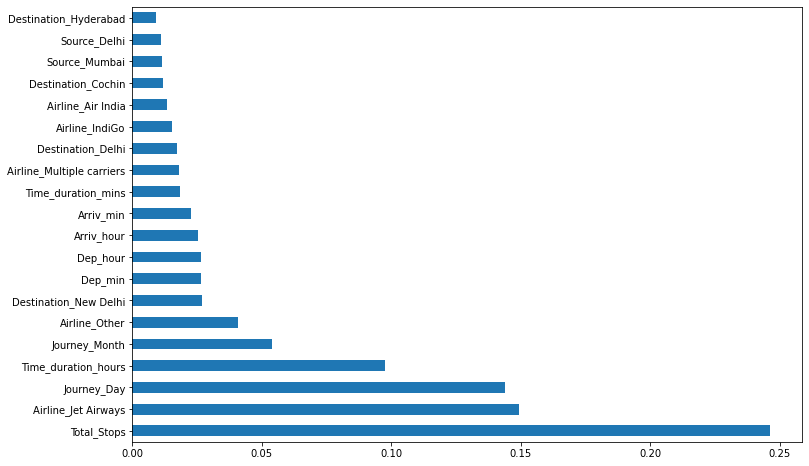

In [84]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg_rndfor = RandomForestRegressor()
reg_rndfor.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
y_predt = reg_rndfor.predict(X_test)

In [87]:
reg_rndfor.score(X_train, y_train)

0.9576866989960668

In [88]:
reg_rndfor.score(X_test, y_test)

0.8014499491402017

c:\users\kartikhp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


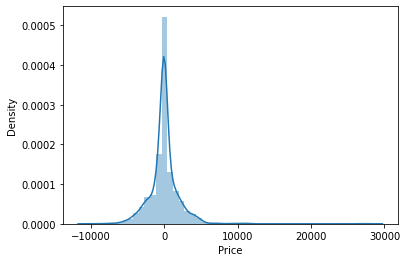

In [90]:
sns.distplot(y_test-y_predt)
plt.show()

In [ ]:
--------------------------------------------------------------------------------------------------------